In [12]:
# Importing Necessary Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For reSize of plot width=20, height=10
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#for 3d plot
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# Reading Data
data = pd.read_csv('student.csv')

print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [8]:
math = data['Math']
read = data['Reading']
write = data['Writing']
m = len(math)
# Initial Coefficients
theta = [0, 0, 0]
alpha = 0.0001
iters = 100000

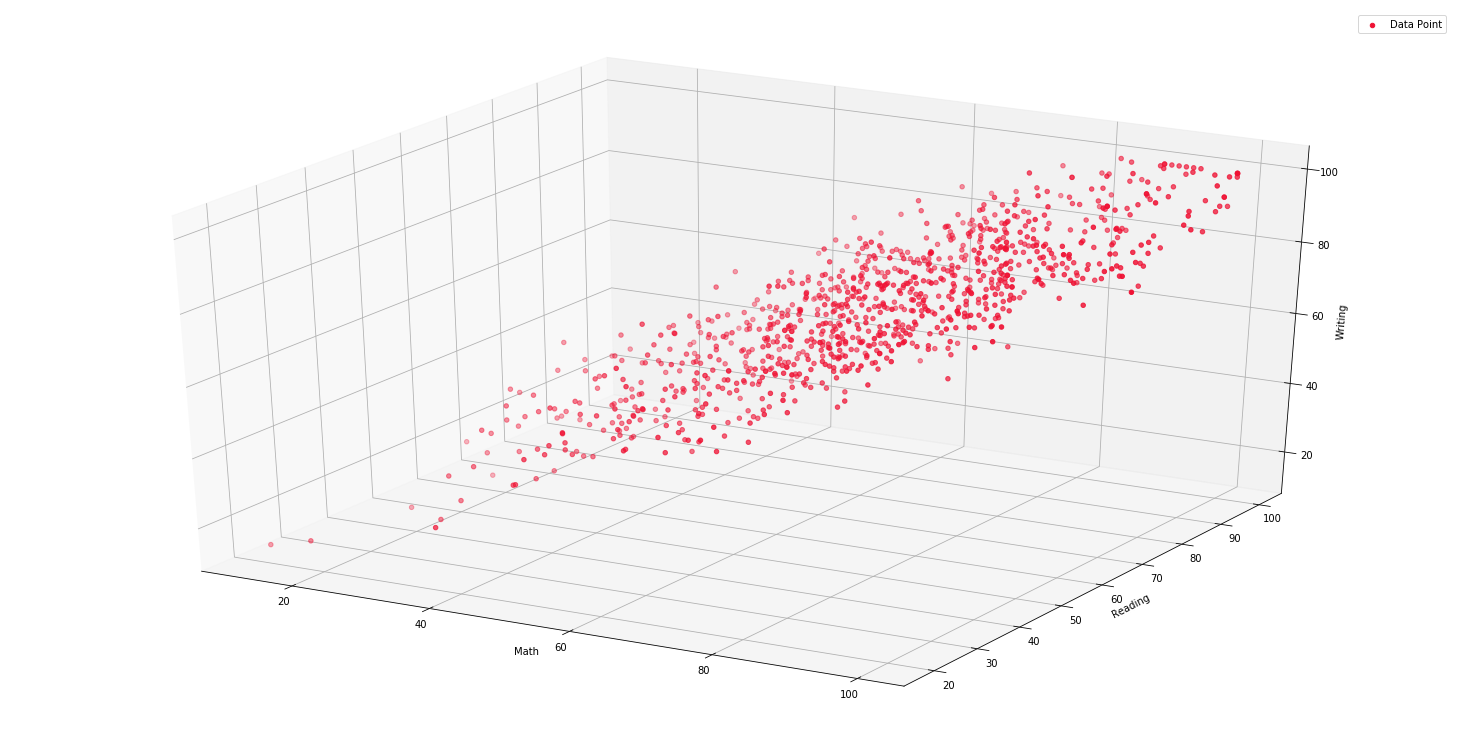

In [13]:
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234',label='Data Point')
ax.set_xlabel('Math')
ax.set_ylabel('Reading')
ax.set_zlabel("Writing")
plt.legend()
plt.show()


In [9]:
for epoch in range(iters):
    j0 = 0
    j1 = 0
    j2 = 0
    for i in range(m):
        # Compute Hypothesis
        h = theta[0] + theta[1]*math[i] + theta[2]*read[i]
        # Compute Loss
        loss = h - write[i]
    
        j0 += loss
        j1 += (loss)* math[i]
        j2 += (loss)* read[i]
        
    theta[0] = theta[0] - alpha * (j0/m)
    theta[1] = theta[1] - alpha * (j1/m)
    theta[2] = theta[2] - alpha * (j2/m)
    
    if epoch%1000 == 0:
        print(epoch,theta)

0 [0.006861600000000001, 0.48011850000000006, 0.5006844]
1000 [0.0027346808235099115, 0.09438767235350277, 0.8919160112970765]
2000 [-0.0031306837919863294, 0.08920273207804183, 0.8970033657611706]
3000 [-0.008993887498969472, 0.08916156117201951, 0.897123727782918]
4000 [-0.01483381528490305, 0.08918814327324309, 0.8971783456763424]
5000 [-0.02065028198463734, 0.08921551025966801, 0.8972318831245598]
6000 [-0.026443378187981103, 0.08924277904983642, 0.8972851941003077]
7000 [-0.0322131977490098, 0.08926993842929574, 0.8973382907228535]
8000 [-0.03795983419256157, 0.08929698868449808, 0.8973911740013544]
9000 [-0.04368338066832383, 0.08932393025188458, 0.8974438447949762]
10000 [-0.04938392995171688, 0.08935076356813516, 0.897496303957509]
11000 [-0.055061574445389797, 0.08937748906820259, 0.8975485523392859]
12000 [-0.06071640618071828, 0.08940410718529163, 0.8976005907872235]
13000 [-0.0663485168192961, 0.08943061835086703, 0.8976524201448353]
14000 [-0.07195799765442085, 0.089457022

In [14]:
# Model Evaluation - RMSE
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred) ** 2) / len(y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(y, y_pred):
    mean_y = np.mean(y)
    ss_tot = sum((y - mean_y) ** 2)
    ss_res = sum((y - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [16]:
y_pred = []
for i in range(m):
    y_pred.append(theta[0] + theta[1]*math[i] + theta[2]*read[i])

print("Mean Square Error : ",rmse(write, y_pred))
print("Accuracy : ",r2_score(write, y_pred))

Mean Square Error :  4.577143972727789
Accuracy :  0.9097223273061553


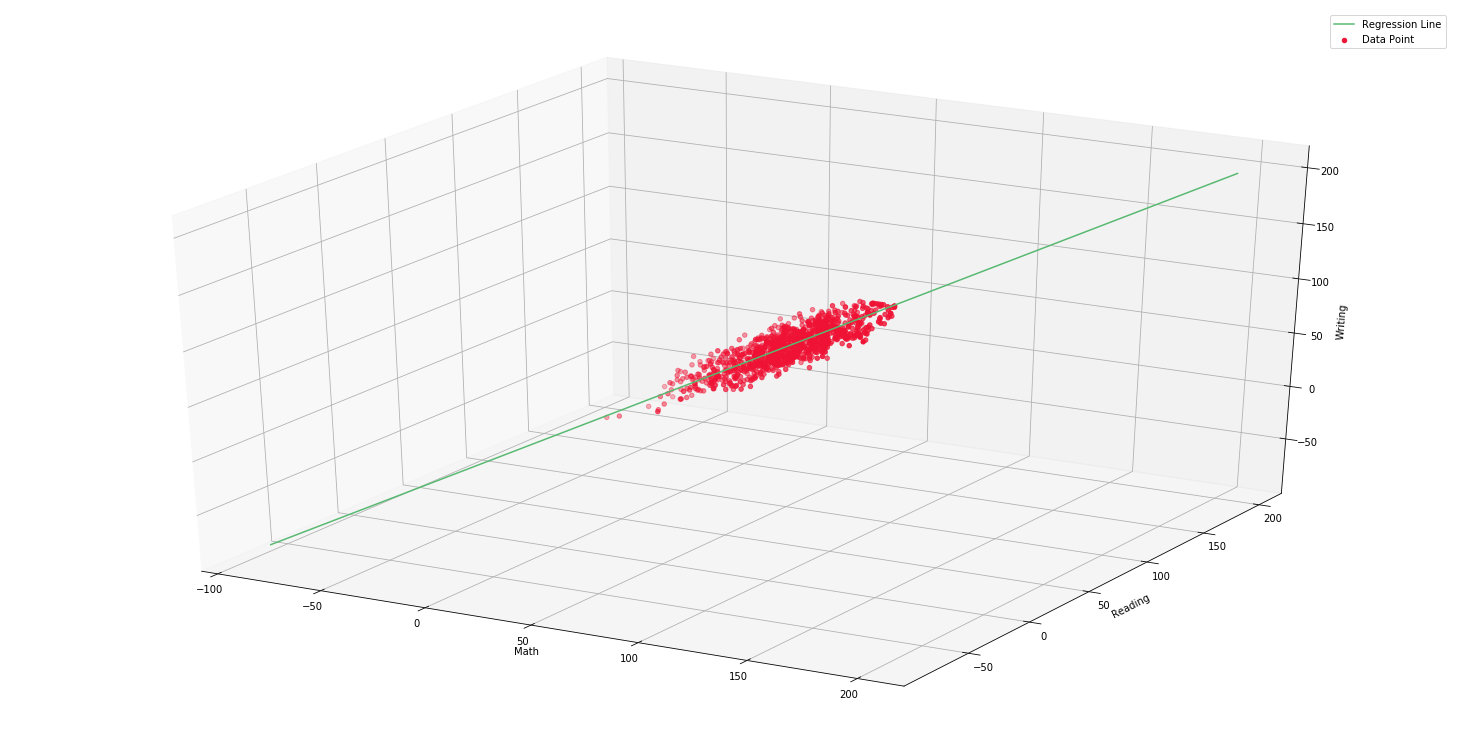

In [17]:
max_x = np.max(math) + 100
min_x = np.min(math) - 100

max_y = np.max(read) + 100
min_y = np.min(read) - 100

max_yp = np.max(y_pred) + 100
min_yp = np.min(y_pred) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = np.linspace(min_y, max_y, 1000)
yp = np.linspace(min_yp, max_yp, 1000)

# Ploting the scores as scatter plot

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, yp, color='#58b970', label='Regression Line')
ax.scatter(math, read, write, color='#ef1234',label='Data Point')
ax.set_xlabel('Math')
ax.set_ylabel('Reading')
ax.set_zlabel("Writing")
plt.legend()
plt.show()
